In [40]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [5]:
import pandas as pd

poem = pd.read_csv("唐詩三百首.csv")
poem_texts = poem['Poem Text'].to_list()
print(poem_texts)

['昔歲逢太平，山林二十年。泉源在庭戶，洞壑當門前。井稅有常期，日晏猶得眠。忽然遭世變，數歲親戎旃。今來典斯郡，山夷又紛然。城小賊不屠，人貧傷可憐。是以陷鄰境，此州獨得全。使臣將王命，豈不如賊焉。令彼徵歛者，迫之如火煎。誰能絕人命，以作時世賢。思欲委符節，引竿自刺船。將家就魚麥，歸老江湖邊。', '石魚湖，似洞庭，夏水欲滿君山青。山為樽，水為沼，酒徒歷歷坐洲鳥。長風連日作大浪，不能廢人運酒舫。我持長瓢坐巴邱，酌飲四座以散愁。', '謝公最小偏憐女，自嫁黔婁百事乖。顧我無衣搜藎篋，泥他沽酒拔金釵。野蔬充膳甘長藿，落葉添薪仰古槐。今日俸錢過十萬，與君營奠復營齋。', '昔日戲言身後事，今朝都到眼前來。衣裳已施行看盡，針線猶存未忍開。尚想舊情憐婢僕，也曾因夢送錢財。誠知此恨人人有，貧賤夫妻百事哀。', '閒坐悲君亦自悲，百年都是幾多時？鄧攸無子尋知命，潘岳悼亡猶費詞。同穴窅冥何所望，他生緣會更難期。唯將終夜長開眼，報答平生未展眉。', '寥落古行宮，宮花寂寞紅。白頭宮女在，閒坐說玄宗。', '白日依山盡，黃河入海流。欲窮千里目，更上一層樓。', '黃河遠上白雲間，一片孤城萬仞山。羌笛何須怨楊柳，春風不度玉門關。', '高臥南齋時，開帷月初吐。清輝淡水木，演漾在窗戶。苒苒幾盈虛，澄澄變今古。美人清江畔，是夜越吟苦。千里其如何，微風吹蘭杜。', '蟬鳴桑樹間，八月蕭關道。出塞復入塞，處處黃蘆草。從來幽并客，皆向沙場老。莫作游俠兒，矜誇紫騮好。', '飲馬渡秋水，水寒風似刀。平沙日未沒，黯黯見臨洮。昔日長城戰，咸言意氣高。黃塵足今古，白骨亂蓬蒿。', '寒雨連江夜入吳，平明送客楚山孤。洛陽親友如相問，一片冰心在玉壺。', '閨中少婦不知愁，春日凝妝上翠樓。忽見陌頭楊柳色，悔教夫婿覓封侯。', '昨夜風開露井桃，未央前殿月輪高。平陽歌舞新承寵，簾外春寒賜錦袍。', '奉帚平明金殿開，暫將團扇共徘徊。玉顏不及寒鴉色，猶帶昭陽日影來。', '秦時明月漢時關，萬里長征人未還。但使龍城飛將在，不教胡馬度陰山。', '城闕輔三秦，風煙望五津。與君離別意，同是宦遊人。海內存知己，天涯若比鄰。無為在歧路，兒女共沾巾。', '三日入廚下，洗手作羹湯。未諳姑食性，先遣小姑嘗。', '下馬飲君酒，問君何所之？君言不得意，歸臥南山陲。但去莫復問，白雲無盡時。', '聖代無隱者，英靈盡來歸。遂令東山客，

In [30]:
vocab = set()

for text in poem_texts:
    text_chars = set(text)
    vocab.update(text_chars)

print(vocab)
vocab_size = len(vocab)
print(vocab_size)

{'羹', '舍', '哭', '發', '逕', '騁', '賞', '載', '社', '陲', '嵬', '碎', '焉', '修', '衱', '波', '戈', '及', '昭', '曳', '彩', '越', '形', '雨', '待', '裡', '翰', '家', '旋', '恨', '渚', '：', '故', '除', '旃', '戚', '夔', '涓', '俊', '寺', '寰', '啾', '朵', '佳', '蘆', '姑', '謫', '誤', '閟', '永', '僂', '訾', '得', '岳', '茨', '夕', '歧', '哥', '觀', '蓮', '宋', '晝', '淡', '崇', '久', '接', '糲', '處', '杲', '螘', '弟', '懷', '濕', '賒', '嘯', '熊', '憎', '涕', '抱', '濛', '鑪', '鼇', '駕', '垂', '明', '淼', '迴', '棋', '坎', '表', '猛', '運', '更', '謀', '中', '驂', '改', '下', '嗚', '爭', '鄉', '帳', '央', '生', '健', '昧', '圉', '瓶', '扇', '旒', '窠', '龍', '孤', '口', '態', '裂', '造', '潘', '支', '潔', '霧', '墨', '鎮', '程', '殘', '粉', '窗', '北', '限', '銖', '已', '殿', '層', '勒', '適', '楓', '薜', '吳', '敬', '突', '鴛', '河', '宇', '渺', '離', '恢', '樓', '年', '尋', '備', '勤', '呂', '椒', '裹', '翥', '簪', '耕', '坦', '落', '墮', '簾', '估', '禽', '淳', '俸', '精', '慮', '忘', '鳳', '鐘', '凜', '非', '列', '樂', '嬋', '射', '巖', '必', '煮', '康', '蹉', '委', '兄', '畔', '就', '灩', '荷', '雪', '倫', '闌', '庾', '畫', '標', '姓', '疊', '犀', '鴻', '智', '漢', '麾',

In [6]:
chars = sorted(list(set(''.join(poem_texts))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [22]:
block_size = (
    5  # context length: how many characters do we take to predict the next one?
)
X, Y = [], []
for w in poem_texts[2:3]:
    print(w)
    context = [0] * block_size
    for ch in w + ".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]  # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

朱雀橋邊野草花，烏衣巷口夕陽斜。舊時王謝堂前燕，飛入尋常百姓家。
..... ---> 朱
....朱 ---> 雀
...朱雀 ---> 橋
..朱雀橋 ---> 邊
.朱雀橋邊 ---> 野
朱雀橋邊野 ---> 草
雀橋邊野草 ---> 花
橋邊野草花 ---> ，
邊野草花， ---> 烏
野草花，烏 ---> 衣
草花，烏衣 ---> 巷
花，烏衣巷 ---> 口
，烏衣巷口 ---> 夕
烏衣巷口夕 ---> 陽
衣巷口夕陽 ---> 斜
巷口夕陽斜 ---> 。
口夕陽斜。 ---> 舊
夕陽斜。舊 ---> 時
陽斜。舊時 ---> 王
斜。舊時王 ---> 謝
。舊時王謝 ---> 堂
舊時王謝堂 ---> 前
時王謝堂前 ---> 燕
王謝堂前燕 ---> ，
謝堂前燕， ---> 飛
堂前燕，飛 ---> 入
前燕，飛入 ---> 尋
燕，飛入尋 ---> 常
，飛入尋常 ---> 百
飛入尋常百 ---> 姓
入尋常百姓 ---> 家
尋常百姓家 ---> 。
常百姓家。 ---> .


In [26]:
def build_dataset(poem_texts):
    block_size = (
        5  # context length: how many characters do we take to predict the next one?
    )
    X, Y = [], []
    for w in poem_texts:
        # print(w)
        context = [0] * block_size
        for ch in w + ".":
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix]  # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y


In [27]:
import random

random.seed(42)
random.shuffle(poem_texts)
n1 = int(0.8*len(poem_texts))
n2 = int(0.9*len(poem_texts))

Xtr, Ytr = build_dataset(poem_texts[:n1])
Xdev, Ydev = build_dataset(poem_texts[n1:n2])
Xte, Yte = build_dataset(poem_texts[n2:])

torch.Size([17103, 5]) torch.Size([17103])
torch.Size([3328, 5]) torch.Size([3328])
torch.Size([2700, 5]) torch.Size([2700])


In [31]:
vocab = set()

for text in poem_texts:
    text_chars = set(text)
    vocab.update(text_chars)

print(vocab)
vocab_size = len(vocab)
print(vocab_size)

{'羹', '舍', '哭', '發', '逕', '騁', '賞', '載', '社', '陲', '嵬', '碎', '焉', '修', '衱', '波', '戈', '及', '昭', '曳', '彩', '越', '形', '雨', '待', '裡', '翰', '家', '旋', '恨', '渚', '：', '故', '除', '旃', '戚', '夔', '涓', '俊', '寺', '寰', '啾', '朵', '佳', '蘆', '姑', '謫', '誤', '閟', '永', '僂', '訾', '得', '岳', '茨', '夕', '歧', '哥', '觀', '蓮', '宋', '晝', '淡', '崇', '久', '接', '糲', '處', '杲', '螘', '弟', '懷', '濕', '賒', '嘯', '熊', '憎', '涕', '抱', '濛', '鑪', '鼇', '駕', '垂', '明', '淼', '迴', '棋', '坎', '表', '猛', '運', '更', '謀', '中', '驂', '改', '下', '嗚', '爭', '鄉', '帳', '央', '生', '健', '昧', '圉', '瓶', '扇', '旒', '窠', '龍', '孤', '口', '態', '裂', '造', '潘', '支', '潔', '霧', '墨', '鎮', '程', '殘', '粉', '窗', '北', '限', '銖', '已', '殿', '層', '勒', '適', '楓', '薜', '吳', '敬', '突', '鴛', '河', '宇', '渺', '離', '恢', '樓', '年', '尋', '備', '勤', '呂', '椒', '裹', '翥', '簪', '耕', '坦', '落', '墮', '簾', '估', '禽', '淳', '俸', '精', '慮', '忘', '鳳', '鐘', '凜', '非', '列', '樂', '嬋', '射', '巖', '必', '煮', '康', '蹉', '委', '兄', '畔', '就', '灩', '荷', '雪', '倫', '闌', '庾', '畫', '標', '姓', '疊', '犀', '鴻', '智', '漢', '麾',

In [38]:
vocab_size += 1
embedding_size = 10
block_size = 5
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((vocab_size, embedding_size), generator=g)
W1 = torch.randn((block_size*embedding_size, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, vocab_size), generator=g)
b2 = torch.randn(vocab_size, generator=g)
parameters = [C, W1, b1, W2, b2]

In [35]:
sum(p.nelement() for p in parameters) # number of parameters in total

540452

In [57]:
for p in parameters:
    p.requires_grad = True

lri = []
lossi = []
stepi = []

from tqdm import tqdm

for i in tqdm(range(200000)):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass
    emb = C[Xtr[ix]]  # (32, 3, 10)
    h = torch.tanh(emb.view(-1, block_size * embedding_size) @ W1 + b1)  # (32, 200)
    logits = h @ W2 + b2  # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    # lr = lrs[i]
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
    # print('Current step:',i)

# print(loss.item())

100%|██████████| 200000/200000 [05:09<00:00, 646.12it/s]


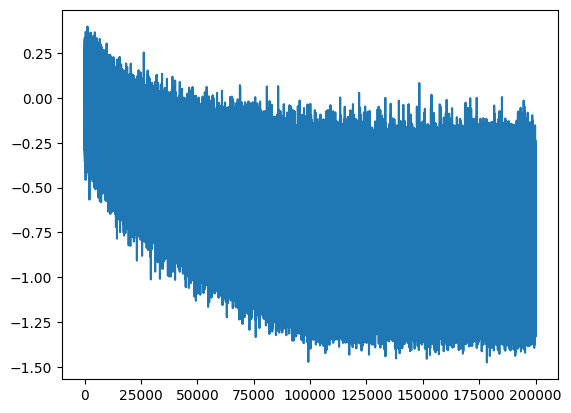

In [58]:
plt.plot(stepi, lossi)

In [61]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, block_size*embedding_size) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(26.1114, grad_fn=<NllLossBackward0>)

In [66]:
# sample from the model
g = torch.Generator().manual_seed(20221231)

for _ in range(5):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

更，遙漱久書幾傾，此夫清本梵，碧漾不相重羈船塘左珍此代水，春憶邱到獨，毛陽清兒人攔。君我籬翥酒堪過懸藤？.
青無城古日，月來高湖征。無看謝山花鳥賒是，還有池荒冷歸菲山。.
蓬門未識綺羅香，擬託良媒益自傷。誰愛風流高格調，共憐時世儉梳妝。敢將十指誇鍼巧，雲門坐風失春，匈寞河潸白，交馬雲帆滋益。古。落衣此徒老嘗驚深落還。況向不有別，枯切獨。列識俗蕩爭織出讀華華盡，終欲難杯西。時帝西沉四。.
幾道有代昨山上征。.
旅在捲帝皆一通限，唯開亦不旄心陽迴寒勿繼。昭章脫幾鸞惜髮邱。漢憐樓花蒼住煙，餘泉光馬林，門以芬蛾傅，馬淚鬢黃龍師。.


In [73]:
# sample from the model
g = torch.Generator().manual_seed(100)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

籠鴻搖已江酌通，時陰石動赤。長開情海夜，垂喚倚命悅陽苦，文攢九邊長。回問靄氣苔路寓。黃不祠舊去。.
漁家頗籠薄蟲息間茫。余是一長誰。琴窅贈舟不餘，去海發無淚，恨消，雨花。.
山開有撥束遲頭作薄人石月困高益。節膽塘山踏休暗時。四城為鳥影往。情歌一蛇冰留是。.
朱不事細樓人，扁軍青兮到，.
十年歌頭送名，四持只軍風雙，秋騎日自可。為子幾流無。明蕭古處迴。.
生壑一離山吳。歡風幾來無。.
蘭朝高，嶺極通峰唯此問如，雲何豈思下。便，一爾玉修到。人燈見曙惻君鯉三。.
故人紅尋對精邊。庾垂元田何言人夢裡疏。平弄一與止，思劍伴莫裡來安成中。黃斗瞿松夫載邱顏。正夜齧絕能，君沙長白金，山.
北瑟新是圓，風見拂櫪五。長業流呼隔斜望過。，遠別以下騁帖。.
閨中少婦不知愁，春日凝滿君江我不還。遺猿猶遊春。.
客瑟不覺滿。.
颯門東荒幕青蒸青廢何，無見不毛教籌。從生見窮向色誰行見微場春骨未花。歸色風文不，採問河秋水巢音書嘉夜越沙。絡人重山日南。.
別簟怨遙報渚繞龍桂。夜從斷客不相，，萬去征折雨。.
皇君美故周如慘鋪。.
昔夜月黃不裘將士適。色煙十陽俗。父輪變面謠悲，一年萬蘭東。闕生洲暗壘何黃鶴嘶。鄴山與牧始殺意。.
纖別佳淺行人，天天，曉水成堆漢雲君客垂遲扉。鄉中急文巖貯家，一昭殊消年，千人一潮山動。窕花連薄曉羅浪畫。東是蒼靂邊。.
前生古舫漸，號慎罷狂枉，蛾官冥屋林剡場，王媕何流溪。但徑雲人無衣驚衰何，之妃炊室李遊。主嫌倏陵迴。.
漢不異碧床，舉望調悟曲。.
花河此夜城芬。。朝至虎行水，我照下落漢朝，力帝。一覽涕令重鎖昏新。仙明苦施已芙雲客是縫驚江。世知得雲擁，秋。王看宮中雲暗鴻安山。斷妻剪。佛日不萬不見驅風陌存。夜客。白處下為時行上回空，春在中天西。閒風事廢濁愁。.
移樽花猶蕭語醉星親畏。潛有，飛狐殘鳴遂。煩夜無身來欲雨。不床斷持雖疾斷鳥席頭。.
